In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score , classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from wordcloud import WordCloud


In [41]:
df = pd.read_csv('train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [42]:
x = df['Text']
y = df['Category']

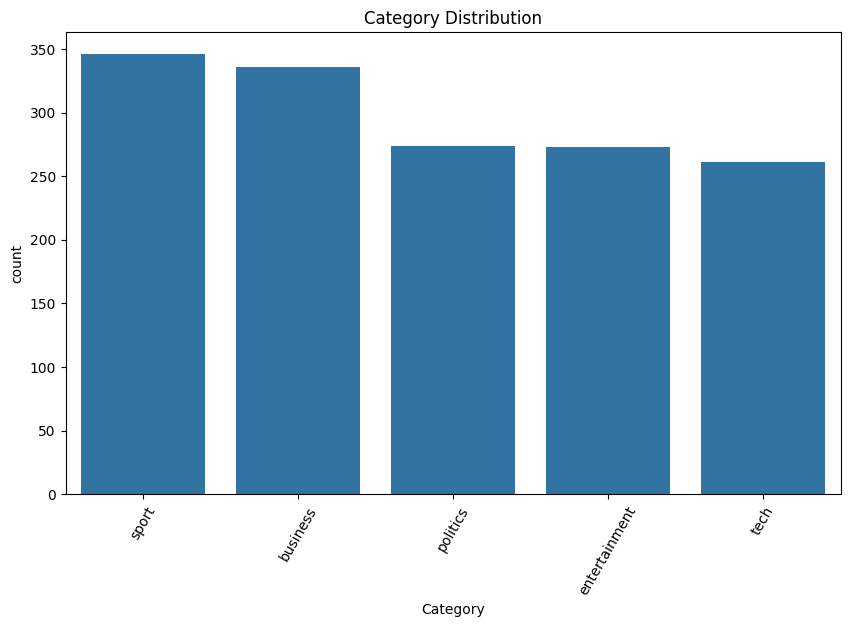

In [43]:
#category

plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'Category', order= df['Category'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Category Distribution')
plt.show()

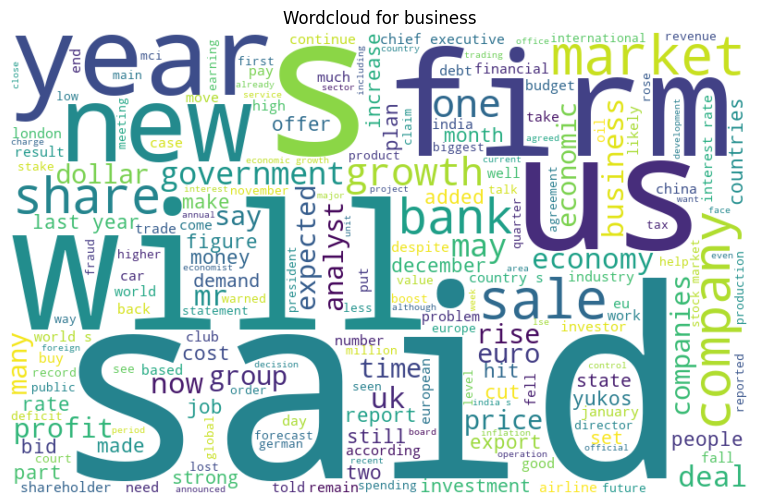

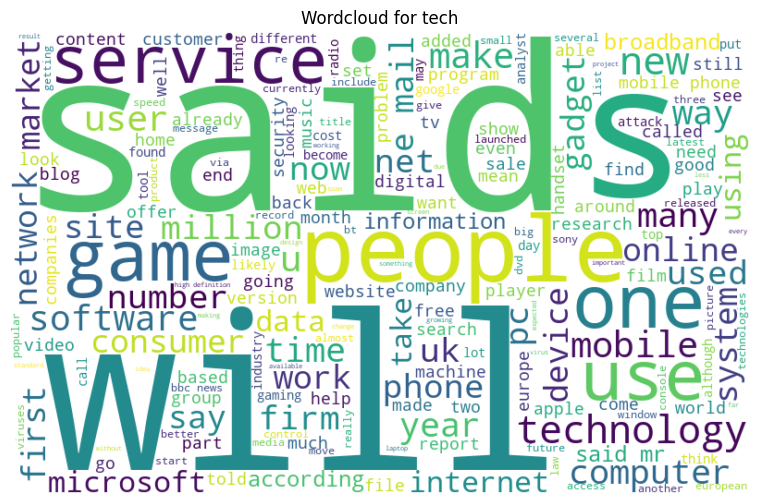

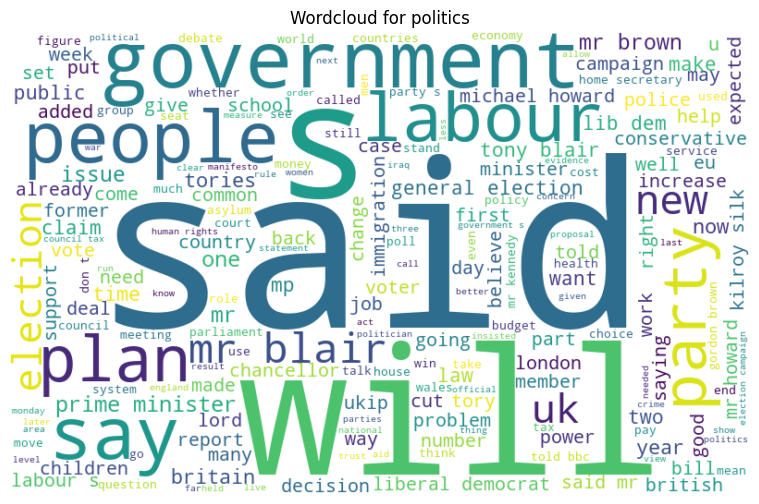

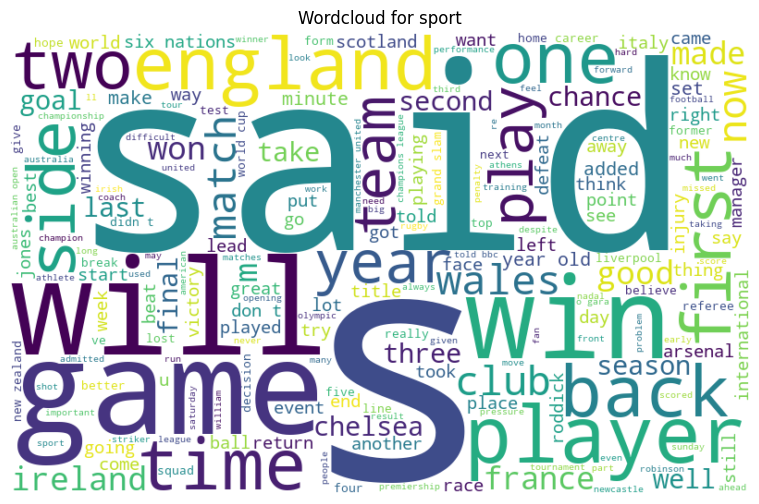

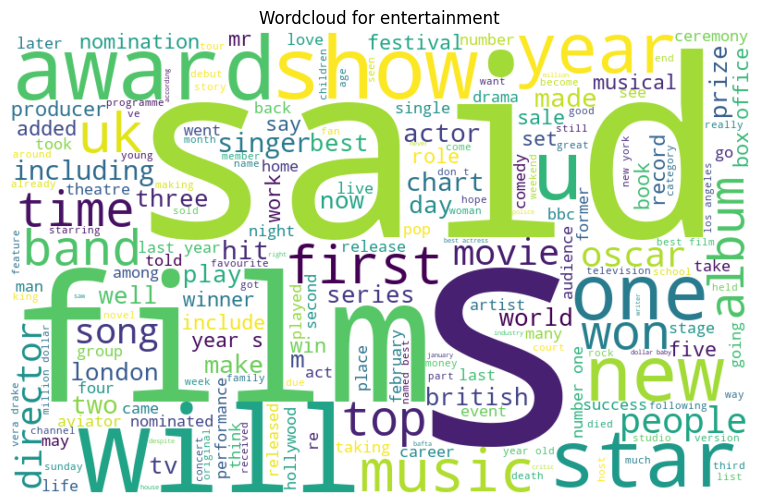

In [44]:
for category in df['Category'].unique():
    # Get all texts for this category
    text = " ".join(df[df['Category']==category]['Text'].values)
    
    # Create word cloud object first, then generate
    wordcloud = WordCloud(width=800, height=500, background_color='white')
    wordcloud.generate(text)
    
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud for {category}')
    plt.show()

In [45]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [46]:
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("Downloading required NLTK resources...")
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bishwashchaudhari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bishwashchaudhari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bishwashchaudhari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    text = ' '.join(tokens)
    return text


In [48]:
X = df['Text']
y = df['Category']
X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [49]:
nb_model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print('Naive Bayes Classification Report:')
print("Acccuracy:", accuracy_score(y_test, y_pred_nb))

print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
Acccuracy: 0.9563758389261745
               precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



In [50]:
new_texts = [
    'This movie was incredible!',
    'The acting was amazing, but the plot was terrible.',
    'I absolutely loved this movie!',
    'I disliked the acting in this movie.',
    'The government announced new tarriffs ahead of G20 summit.'
]

y_pred_new = nb_model.predict(new_texts)

for text, prediction in zip(new_texts, y_pred_new):
    print(f'Text:{text}: Predicted Category:{prediction}')

Text:This movie was incredible!: Predicted Category:entertainment
Text:The acting was amazing, but the plot was terrible.: Predicted Category:entertainment
Text:I absolutely loved this movie!: Predicted Category:entertainment
Text:I disliked the acting in this movie.: Predicted Category:entertainment
Text:The government announced new tarriffs ahead of G20 summit.: Predicted Category:politics


In [51]:
# Create and fit the SVM model
svm_model = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    SVC(kernel='linear', probability=True)
)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print('SVM Classification Report:')
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
Accuracy: 0.977

Detailed Classification Report:
               precision    recall  f1-score   support

     business       0.94      0.99      0.96        75
entertainment       0.98      1.00      0.99        46
     politics       0.98      0.95      0.96        56
        sport       1.00      1.00      1.00        63
         tech       1.00      0.95      0.97        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298

